In [3]:
pwd

'/scratch/hp2173'

# 2.Preprocess the Datasets

In [10]:
pip install nibabel

Defaulting to user installation because normal site-packages is not writeable
  Using cached nibabel-3.2.1-py3-none-any.whl (3.3 MB)
You should consider upgrading via the '/share/apps/python/3.8.6/intel/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import os
import numpy as np
from nibabel.testing import data_path
import nibabel as nib
import matplotlib.pyplot as plt

## 1) Visualize the MRI images 

<ipython-input-7-daae39f04b2f>:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  T1_weighted_example = nib.load('/scratch/hp2173/training/training01/preprocessed/training01_01_mprage_pp.nii').get_data()
<ipython-input-7-daae39f04b2f>:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  T2_weighted_example = nib.load('/scratch/hp2173/training/training01/preprocessed/training01_01_t2_pp.nii').get_data()
<ipython-input-7-daae39f04b2f>:3: DeprecationWarning: get_data() is de

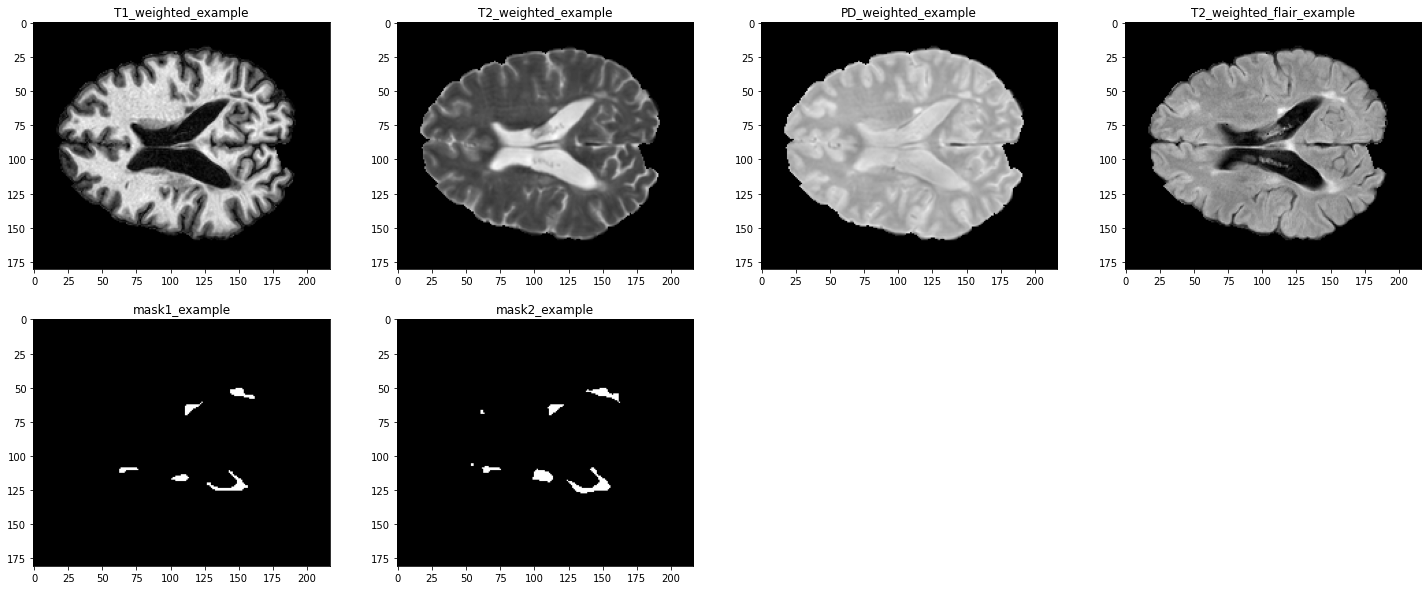

In [7]:
T1_weighted_example = nib.load('/scratch/hp2173/training/training01/preprocessed/training01_01_mprage_pp.nii').get_data()
T2_weighted_example = nib.load('/scratch/hp2173/training/training01/preprocessed/training01_01_t2_pp.nii').get_data()
PD_weighted_example = nib.load('/scratch/hp2173/training/training01/preprocessed/training01_01_pd_pp.nii').get_data()
T2_weighted_flair_example = nib.load('/scratch/hp2173/training/training01/preprocessed/training01_01_flair_pp.nii').get_data()
mask1_example = nib.load('/scratch/hp2173/training/training01/masks/training01_01_mask1.nii').get_data()
mask2_example = nib.load('/scratch/hp2173/training/training01/masks/training01_01_mask2.nii').get_data()
plt.figure(figsize=(25,10))
plt.subplot(2,4,1)
plt.imshow(T1_weighted_example[:,:,90],'gray')
plt.title('T1_weighted_example')
plt.subplot(2,4,2)
plt.imshow(T2_weighted_example[:,:,90],'gray')
plt.title('T2_weighted_example')
plt.subplot(2,4,3)
plt.imshow(PD_weighted_example[:,:,90],'gray')
plt.title('PD_weighted_example')
plt.subplot(2,4,4)
plt.imshow(T2_weighted_flair_example[:,:,90],'gray')
plt.title('T2_weighted_flair_example')
plt.subplot(2,4,5)
plt.imshow(mask1_example[:,:,90],'gray')
plt.title('mask1_example')
plt.subplot(2,4,6)
plt.imshow(mask2_example[:,:,90],'gray')
plt.title('mask2_example')

plt.pause(3)

In [8]:
# ipywidgets for some interactive plots
from ipywidgets.widgets import * 
import ipywidgets as widgets
# slide through dicom images using a slide bar 
def dicom_animation(x):
    plt.figure(figsize=(20,10))
    plt.imshow(T1_weighted_example[:,:,x],'gray')
    return x
interact(dicom_animation, x=(0, len(T1_weighted_example)-1))

interactive(children=(IntSlider(value=90, description='x', max=180), Output()), _dom_classes=('widget-interact…

<function __main__.dicom_animation(x)>

## 2) Define function to process 2 raters' groundtruth  

In [9]:
def weight_ground_truth(mask1_path, mask2_path):
  mask1=nib.load(mask1_path).get_data()
  mask2=nib.load(mask2_path).get_data()
  if mask1.shape==mask2.shape:
    fig_shape = mask1.shape 
  else:
    print('Number inconformity for mask, double check path!')
  
  n=fig_shape[2]

  mask_and_weight=np.zeros((fig_shape[0], fig_shape[1], n), dtype=np.int)
  mask_or_weight=np.zeros((fig_shape[0], fig_shape[1], n), dtype=np.int)
  mask_rnd_weight=np.zeros((fig_shape[0], fig_shape[1], n), dtype=np.int)

  for i in range(n):
    mask_and_weight[:,:,i] = mask1[:,:,i] & mask2[:,:,i]
    mask_or_weight[:,:,i] = mask1[:,:,i] | mask2[:,:,i]
    mask_rnd_weight = (mask_or_weight - mask_and_weight)*np.random.randint(0,2,(fig_shape[0],fig_shape[1],n)) + mask_and_weight


  return mask_and_weight, mask_or_weight, mask_rnd_weight


<ipython-input-5-527bb657da25>:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mask1=nib.load(mask1_path).get_data()
<ipython-input-5-527bb657da25>:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mask2=nib.load(mask2_path).get_data()


Text(0.5, 1.0, 'mask_rnd_weight')

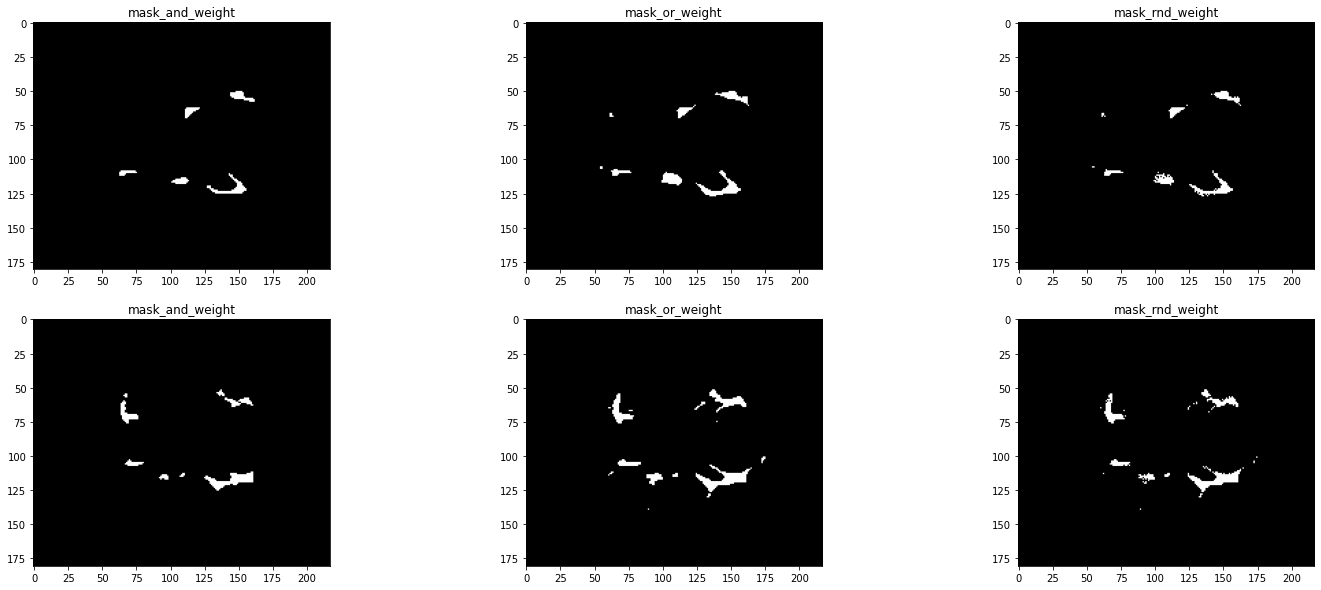

In [7]:
root = '/scratch/hp2173/training/'
#mask_or_weight=np.zeros((fig_shape[0], fig_shape[1], n), dtype=np.int)
#mask_and_weight=np.zeros((fig_shape[0], fig_shape[1], n), dtype=np.int)
mask1_path = os.path.join(root,'training01/masks/training01_01_mask1.nii')
mask2_path = os.path.join(root,'training01/masks/training01_01_mask2.nii')
mask3_path = os.path.join(root,'training02/masks/training02_02_mask1.nii')
mask4_path = os.path.join(root,'training02/masks/training02_02_mask2.nii')

mask_and_weight, mask_or_weight, mask_rnd_weight = weight_ground_truth(mask1_path, mask2_path)
mask_and_weight2, mask_or_weight2, mask_rnd_weight2 = weight_ground_truth(mask3_path, mask4_path)

plt.figure(figsize=(25,10))
plt.subplot(2,3,1)
plt.imshow(mask_and_weight[:,:,90],'gray')
plt.title('mask_and_weight')
plt.subplot(2,3,2)
plt.imshow(mask_or_weight[:,:,90],'gray')
plt.title('mask_or_weight')
plt.subplot(2,3,3)
plt.imshow(mask_rnd_weight[:,:,90],'gray')
plt.title('mask_rnd_weight')
plt.subplot(2,3,4)
plt.imshow(mask_and_weight2[:,:,90],'gray')
plt.title('mask_and_weight')
plt.subplot(2,3,5)
plt.imshow(mask_or_weight2[:,:,90],'gray')
plt.title('mask_or_weight')
plt.subplot(2,3,6)
plt.imshow(mask_rnd_weight2[:,:,90],'gray')
plt.title('mask_rnd_weight')

<ipython-input-5-527bb657da25>:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mask1=nib.load(mask1_path).get_data()
<ipython-input-5-527bb657da25>:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mask2=nib.load(mask2_path).get_data()


Text(0.5, 1.0, 'mask_rnd_weight')

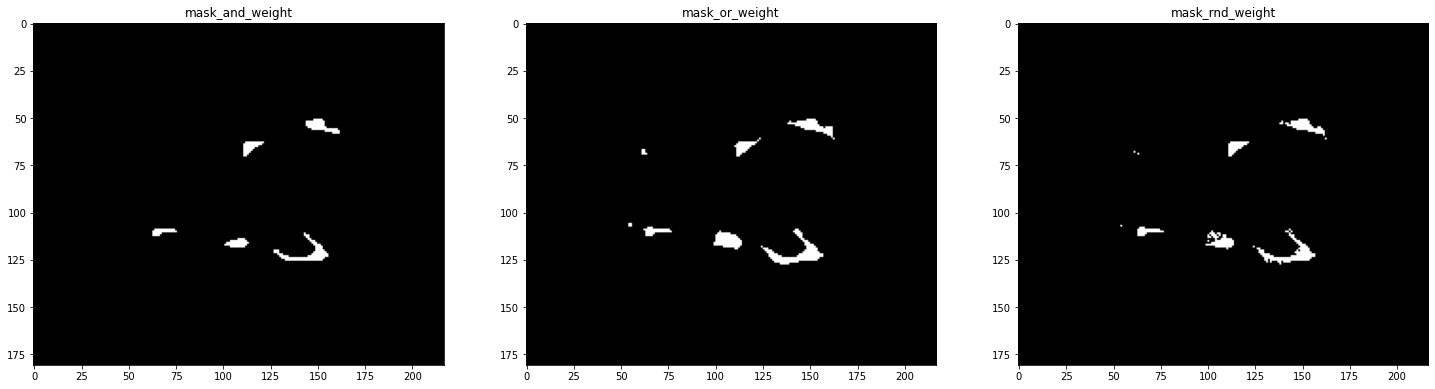

In [8]:
root = '/content/gdrive/MyDrive/ImageVedioPrecessingProject/training/'
#mask_or_weight=np.zeros((fig_shape[0], fig_shape[1], n), dtype=np.int)
#mask_and_weight=np.zeros((fig_shape[0], fig_shape[1], n), dtype=np.int)


mask_and_weight, mask_or_weight, mask_rnd_weight = weight_ground_truth(mask1_path, mask2_path)
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
plt.imshow(mask_and_weight[:,:,90],'gray')
plt.title('mask_and_weight')
plt.subplot(1,3,2)
plt.imshow(mask_or_weight[:,:,90],'gray')
plt.title('mask_or_weight')
plt.subplot(1,3,3)
plt.imshow(mask_rnd_weight[:,:,90],'gray')
plt.title('mask_rnd_weight')

## 3) Make the custom dataset

In [10]:
import glob

In [11]:
base_path = '/scratch/hp2173/training/'
second_path_list = ['training01/','training02/','training03/','training04/','training05/']
mri_list = []
mask1_list = []
mask2_list = []
for i in range(5):
  t1w_path = os.path.join(base_path, second_path_list[i], 'preprocessed/*_mprage_pp.nii')
  t2w_path = os.path.join(base_path, second_path_list[i], 'preprocessed/*_t2_pp.nii')
  pdw_path = os.path.join(base_path, second_path_list[i], 'preprocessed/*_pd_pp.nii')
  t2wf_path = os.path.join(base_path, second_path_list[i], 'preprocessed/*_flair_pp.nii')
  mask1_path = os.path.join(base_path, second_path_list[i], 'masks/*1.nii')
  mask2_path = os.path.join(base_path, second_path_list[i], 'masks/*2.nii')
  mri_temp = sorted(glob.glob(t1w_path)) + sorted(glob.glob(t2w_path)) + sorted(glob.glob(pdw_path)) + sorted(glob.glob(t2wf_path))
  mask1_temp = sorted(glob.glob(mask1_path))
  mask1_temp_list = []
  mask2_temp = sorted(glob.glob(mask2_path))
  mask2_temp_list = []
  for i in range(4):
    mask1_temp_list = mask1_temp_list + mask1_temp
    mask2_temp_list = mask2_temp_list + mask2_temp
  mri_list = mri_list + mri_temp
  mask1_list = mask1_list + mask1_temp_list
  mask2_list = mask2_list + mask2_temp_list

print('Data Collected:', len(mri_list))

Data Collected: 84


<ipython-input-12-e08042e8c8ba>:9: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  ex = nib.load(mri_list[index+i]).get_data()
<ipython-input-12-e08042e8c8ba>:10: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  ms1 = nib.load(mask1_list[index+i]).get_data()
<ipython-input-12-e08042e8c8ba>:11: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(im

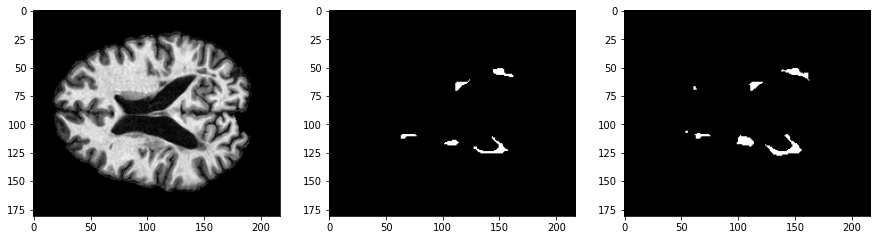

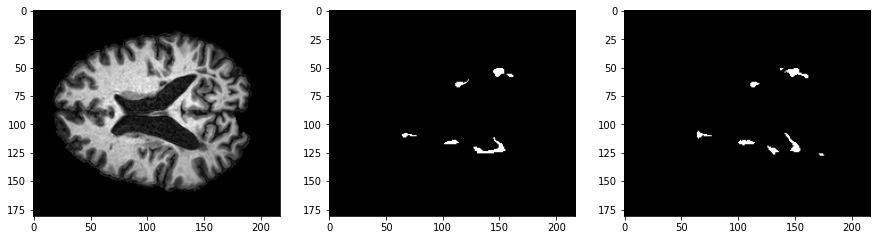

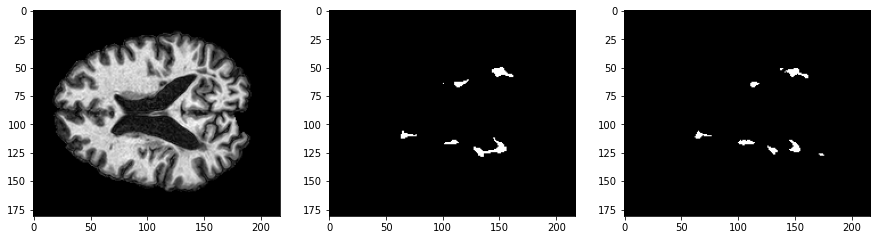

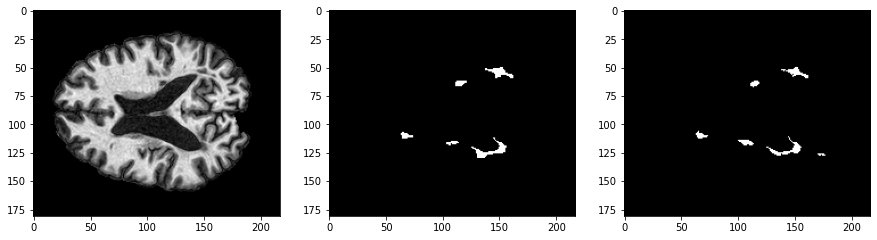

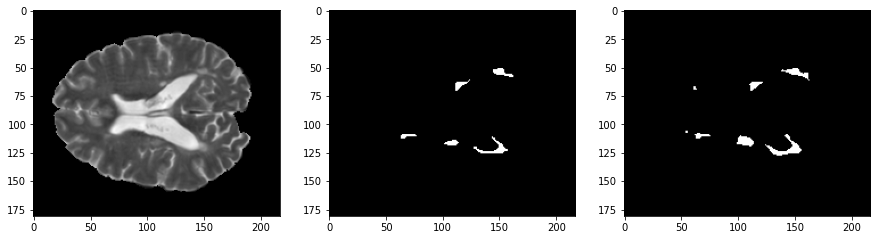

In [12]:
# 0-15:training 1(4 time points)
# 16-31:training 2(4 time points)
# 32-51:training 3(5 time points)
# 52-67:training 4(4 time points)
# 68-83:training 5(4 time points)
# order in one training set: t1_weight, t2_weight, pd_weight, t2_flair_weight
index = 0
for i in range(5):
  ex = nib.load(mri_list[index+i]).get_data()
  ms1 = nib.load(mask1_list[index+i]).get_data()
  ms2 = nib.load(mask2_list[index+i]).get_data()

  plt.figure(figsize=(15,25))
  plt.subplot(5,3,3*i+1)
  plt.imshow(ex[:,:,90],'gray')
  plt.subplot(5,3,3*i+2)
  plt.imshow(ms1[:,:,90],'gray')
  plt.subplot(5,3,3*i+3)
  plt.imshow(ms2[:,:,90],'gray')

In [13]:
from random import shuffle
def shuffle_two_lists(listA, listB, listC):
  temp = list(zip(listA, listB, listC))
  shuffle(temp)
  return zip(*temp)
train_split_ratio = 0.8
test_split_ratio = 0.1
num_samples = len(mri_list)

train_size = int(num_samples * train_split_ratio)
test_size = int(num_samples * test_split_ratio)
val_size = num_samples - train_size - test_size
mri_list_shuffled, mask1_list_shuffled, mask2_list_shuffled = shuffle_two_lists(mri_list, mask1_list, mask2_list)

train_img_list, train_label1_list, train_label2_list = mri_list_shuffled[:train_size], mask1_list_shuffled[:train_size], mask2_list_shuffled[:train_size]
val_img_list, val_label1_list, val_label2_list = mri_list_shuffled[train_size:train_size+ val_size], mask1_list_shuffled[train_size:train_size + val_size], mask2_list_shuffled[train_size:train_size + val_size]
test_img_list, test_label1_list, test_label2_list = mri_list_shuffled[train_size+ val_size:], mask1_list_shuffled[train_size+ val_size:], mask2_list_shuffled[train_size+ val_size:]

print ("Training set size: {}". format(len(train_img_list)))
print ("Validation set size: {}". format(len(val_img_list)))
print ("Test set size: {}". format(len(test_img_list)))

Training set size: 67
Validation set size: 9
Test set size: 8


In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torch.utils.data import Dataset
from tqdm import tqdm

class MRIDataset(Dataset):
  def __init__(self, img_path_list, label1_path_list, label2_path_list, RULE = 'and', IF_TRAIN= False):
    self.mri_path_list = img_path_list
    self.label1_path_list = label1_path_list
    self.label2_path_list = label2_path_list
    self.rule = RULE
    self.IF_TRAIN = IF_TRAIN
    self.mri_list, self.mask_and_list, self.mask_or_list, self.mask_rnd_list = self.preprocess()
  
  def __len__(self):
    return len(self.mri_list)

  def preprocess(self):
    mri_list, mask_and_list, mask_or_list, mask_rnd_list = [], [], [], []
    for idx in tqdm(range(len(self.mri_path_list))):
      mri = nib.load(self.mri_path_list[idx]).get_data()
      mask_and, mask_or, mask_rnd = weight_ground_truth(self.label1_path_list[idx], self.label2_path_list[idx])
      mri_list.append(mri)
      mask_and_list.append(mask_and)
      mask_or_list.append(mask_or)
      mask_rnd_list.append(mask_rnd)
    return mri_list, mask_and_list, mask_or_list, mask_rnd_list

  def __getitem__ (self,idx):
    img = self.mri_list[idx]
    if self.rule=='and':
      mask = self.mask_and_list[idx]
    elif self.rule=='or':
      mask = self.mask_or_list[idx]
    elif self.rule=='random':
      mask = self.mask_rnd_list[idx]
    
    img = torch.Tensor(img)
    label = torch.Tensor(mask)

    return img/255., label

In [15]:
test_label1_list

('/content/gdrive/MyDrive/ImageVedioPrecessingProject/training/training02/masks/training02_02_mask1.nii',
 '/content/gdrive/MyDrive/ImageVedioPrecessingProject/training/training03/masks/training03_04_mask1.nii',
 '/content/gdrive/MyDrive/ImageVedioPrecessingProject/training/training05/masks/training05_02_mask1.nii',
 '/content/gdrive/MyDrive/ImageVedioPrecessingProject/training/training01/masks/training01_01_mask1.nii',
 '/content/gdrive/MyDrive/ImageVedioPrecessingProject/training/training03/masks/training03_01_mask1.nii',
 '/content/gdrive/MyDrive/ImageVedioPrecessingProject/training/training03/masks/training03_02_mask1.nii',
 '/content/gdrive/MyDrive/ImageVedioPrecessingProject/training/training01/masks/training01_04_mask1.nii',
 '/content/gdrive/MyDrive/ImageVedioPrecessingProject/training/training04/masks/training04_02_mask1.nii')

In [16]:
test_label2_list

('/content/gdrive/MyDrive/ImageVedioPrecessingProject/training/training02/masks/training02_02_mask2.nii',
 '/content/gdrive/MyDrive/ImageVedioPrecessingProject/training/training03/masks/training03_04_mask2.nii',
 '/content/gdrive/MyDrive/ImageVedioPrecessingProject/training/training05/masks/training05_02_mask2.nii',
 '/content/gdrive/MyDrive/ImageVedioPrecessingProject/training/training01/masks/training01_01_mask2.nii',
 '/content/gdrive/MyDrive/ImageVedioPrecessingProject/training/training03/masks/training03_01_mask2.nii',
 '/content/gdrive/MyDrive/ImageVedioPrecessingProject/training/training03/masks/training03_02_mask2.nii',
 '/content/gdrive/MyDrive/ImageVedioPrecessingProject/training/training01/masks/training01_04_mask2.nii',
 '/content/gdrive/MyDrive/ImageVedioPrecessingProject/training/training04/masks/training04_02_mask2.nii')

In [17]:
test_img_list

('/content/gdrive/MyDrive/ImageVedioPrecessingProject/training/training02/preprocessed/training02_02_flair_pp.nii',
 '/content/gdrive/MyDrive/ImageVedioPrecessingProject/training/training03/preprocessed/training03_04_flair_pp.nii',
 '/content/gdrive/MyDrive/ImageVedioPrecessingProject/training/training05/preprocessed/training05_02_mprage_pp.nii',
 '/content/gdrive/MyDrive/ImageVedioPrecessingProject/training/training01/preprocessed/training01_01_t2_pp.nii',
 '/content/gdrive/MyDrive/ImageVedioPrecessingProject/training/training03/preprocessed/training03_01_t2_pp.nii',
 '/content/gdrive/MyDrive/ImageVedioPrecessingProject/training/training03/preprocessed/training03_02_t2_pp.nii',
 '/content/gdrive/MyDrive/ImageVedioPrecessingProject/training/training01/preprocessed/training01_04_t2_pp.nii',
 '/content/gdrive/MyDrive/ImageVedioPrecessingProject/training/training04/preprocessed/training04_02_pd_pp.nii')

In [15]:
dataset = MRIDataset(test_img_list, test_label1_list, test_label2_list, RULE = 'and', IF_TRAIN= True)

  0%|          | 0/8 [00:00<?, ?it/s]<ipython-input-14-0011361ddb74>:23: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mri = nib.load(self.mri_path_list[idx]).get_data()
<ipython-input-9-527bb657da25>:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mask1=nib.load(mask1_path).get_data()
<ipython-input-9-527bb657da25>:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going 

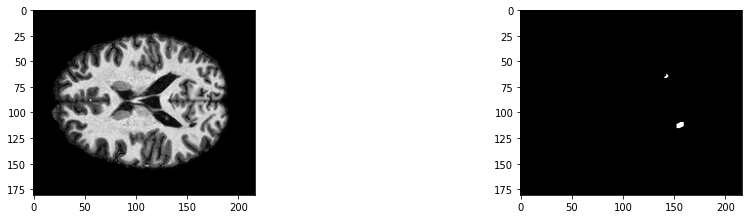

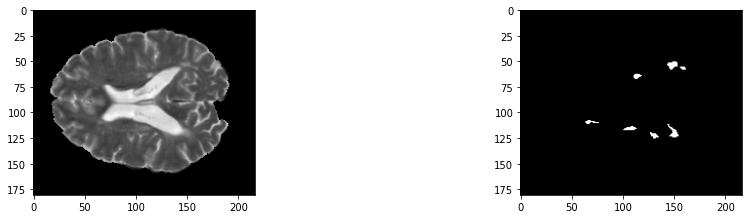

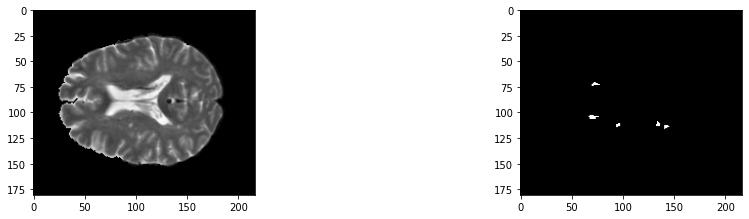

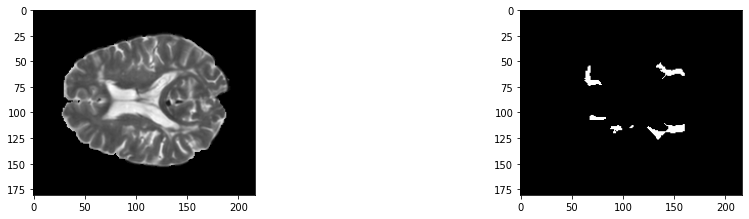

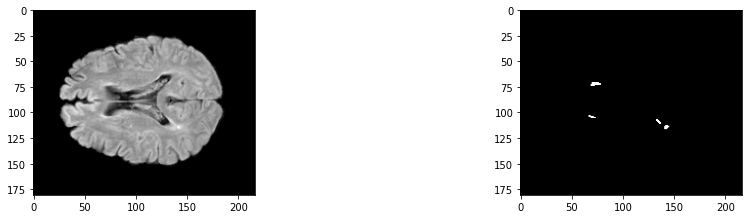

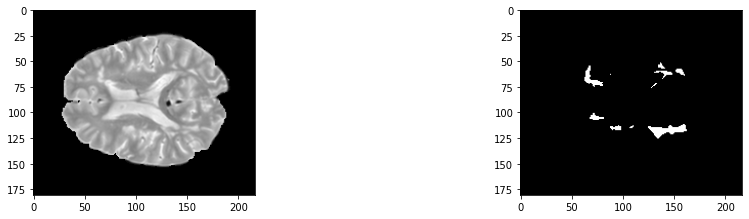

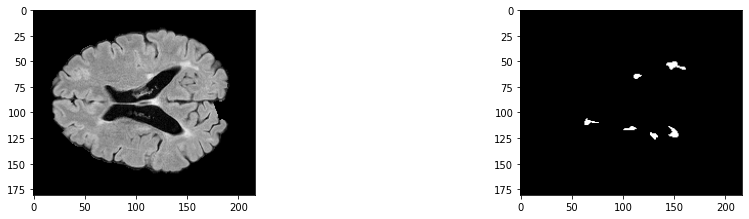

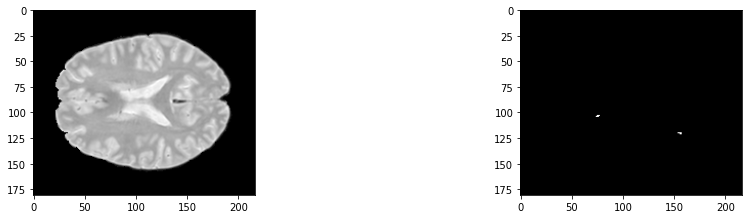

In [16]:
for i in range(len(test_img_list)):
  img, mask = dataset[i]
  plt.figure(figsize = (16,32))
  plt.subplot(len(test_img_list),2,2*i+1)
  plt.imshow(img.cpu().numpy()[:,:,90],'gray')
  plt.subplot(len(test_img_list),2,2*i+2)
  plt.imshow(mask.cpu().numpy()[:,:,90],'gray')

In [17]:
train_dataset = MRIDataset(train_img_list, train_label1_list, train_label2_list, RULE = 'and', IF_TRAIN= True)
val_dataset = MRIDataset(val_img_list, val_label1_list, val_label2_list, RULE = 'and', IF_TRAIN= False)
test_dataset = MRIDataset(test_img_list, test_label1_list, test_label2_list, RULE = 'and', IF_TRAIN= False)

  0%|          | 0/67 [00:00<?, ?it/s]<ipython-input-14-0011361ddb74>:23: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mri = nib.load(self.mri_path_list[idx]).get_data()
<ipython-input-9-527bb657da25>:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mask1=nib.load(mask1_path).get_data()
<ipython-input-9-527bb657da25>:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going

In [18]:
NUM_EPOCH = 40
BATCH_SIZE = 8
LR = 0.001
SAVE_PATH = "/scratch/hp2173/U-net_3D_model"

In [19]:
train_loader = torch.utils.data.DataLoader(train_dataset, 
                                           batch_size=BATCH_SIZE, 
                                           shuffle=True, 
                                           num_workers=0)
val_loader = torch.utils.data.DataLoader(val_dataset, 
                                         batch_size=BATCH_SIZE, 
                                         shuffle=False, 
                                         num_workers=0)
test_loader = torch.utils.data.DataLoader(test_dataset, 
                                         batch_size=BATCH_SIZE, 
                                         shuffle=False, 
                                         num_workers=0)

# 3.Build the Network

In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [21]:
class UNet(nn.Module):
    """
    Implementations based on the Unet3D paper: https://arxiv.org/abs/1606.06650
    """

    def __init__(self, in_channels, n_classes, base_n_filter=8):
        super(UNet, self).__init__()
        self.in_channels = in_channels
        self.n_classes = n_classes
        self.base_n_filter = base_n_filter

        self.lrelu = nn.LeakyReLU()
        self.dropout3d = nn.Dropout3d(p=0.6)
        self.upsacle = nn.Upsample(scale_factor=2, mode='nearest')
        self.softmax = nn.Softmax(dim=1)

        self.conv3d_c1_1 = nn.Conv3d(self.in_channels, self.base_n_filter, kernel_size=3, stride=1, padding=1,
                                     bias=False)
        self.conv3d_c1_2 = nn.Conv3d(self.base_n_filter, self.base_n_filter, kernel_size=3, stride=1, padding=1,
                                     bias=False)
        self.lrelu_conv_c1 = self.lrelu_conv(self.base_n_filter, self.base_n_filter)
        self.inorm3d_c1 = nn.InstanceNorm3d(self.base_n_filter)

        self.conv3d_c2 = nn.Conv3d(self.base_n_filter, self.base_n_filter * 2, kernel_size=3, stride=2, padding=1,
                                   bias=False)
        self.norm_lrelu_conv_c2 = self.norm_lrelu_conv(self.base_n_filter * 2, self.base_n_filter * 2)
        self.inorm3d_c2 = nn.InstanceNorm3d(self.base_n_filter * 2)

        self.conv3d_c3 = nn.Conv3d(self.base_n_filter * 2, self.base_n_filter * 4, kernel_size=3, stride=2, padding=1,
                                   bias=False)
        self.norm_lrelu_conv_c3 = self.norm_lrelu_conv(self.base_n_filter * 4, self.base_n_filter * 4)
        self.inorm3d_c3 = nn.InstanceNorm3d(self.base_n_filter * 4)

        self.conv3d_c4 = nn.Conv3d(self.base_n_filter * 4, self.base_n_filter * 8, kernel_size=3, stride=2, padding=1,
                                   bias=False)
        self.norm_lrelu_conv_c4 = self.norm_lrelu_conv(self.base_n_filter * 8, self.base_n_filter * 8)
        self.inorm3d_c4 = nn.InstanceNorm3d(self.base_n_filter * 8)

        self.conv3d_c5 = nn.Conv3d(self.base_n_filter * 8, self.base_n_filter * 16, kernel_size=3, stride=2, padding=1,
                                   bias=False)
        self.norm_lrelu_conv_c5 = self.norm_lrelu_conv(self.base_n_filter * 16, self.base_n_filter * 16)
        self.norm_lrelu_upscale_conv_norm_lrelu_l0 = self.norm_lrelu_upscale_conv_norm_lrelu(self.base_n_filter * 16, self.base_n_filter * 8)

        self.conv3d_l0 = nn.Conv3d(self.base_n_filter * 8, self.base_n_filter * 8, kernel_size=1, stride=1, padding=0,
                                   bias=False)
        self.inorm3d_l0 = nn.InstanceNorm3d(self.base_n_filter * 8)

        self.conv_norm_lrelu_l1 = self.conv_norm_lrelu(self.base_n_filter * 16, self.base_n_filter * 16)
        self.conv3d_l1 = nn.Conv3d(self.base_n_filter * 16, self.base_n_filter * 8, kernel_size=1, stride=1, padding=0,
                                   bias=False)
        self.norm_lrelu_upscale_conv_norm_lrelu_l1 = self.norm_lrelu_upscale_conv_norm_lrelu(self.base_n_filter * 8,self.base_n_filter * 4)

        self.conv_norm_lrelu_l2 = self.conv_norm_lrelu(self.base_n_filter * 8, self.base_n_filter * 8)
        self.conv3d_l2 = nn.Conv3d(self.base_n_filter * 8, self.base_n_filter * 4, kernel_size=1, stride=1, padding=0,
                                   bias=False)
        self.norm_lrelu_upscale_conv_norm_lrelu_l2 = self.norm_lrelu_upscale_conv_norm_lrelu(self.base_n_filter * 4,self.base_n_filter * 2)

        self.conv_norm_lrelu_l3 = self.conv_norm_lrelu(self.base_n_filter * 4, self.base_n_filter * 4)
        self.conv3d_l3 = nn.Conv3d(self.base_n_filter * 4, self.base_n_filter * 2, kernel_size=1, stride=1, padding=0,
                                   bias=False)
        self.norm_lrelu_upscale_conv_norm_lrelu_l3 = self.norm_lrelu_upscale_conv_norm_lrelu(self.base_n_filter * 2,self.base_n_filter)

        self.conv_norm_lrelu_l4 = self.conv_norm_lrelu(self.base_n_filter * 2, self.base_n_filter * 2)
        self.conv3d_l4 = nn.Conv3d(self.base_n_filter * 2, self.n_classes, kernel_size=1, stride=1, padding=0,bias=False)

        self.ds2_1x1_conv3d = nn.Conv3d(self.base_n_filter * 8, self.n_classes, kernel_size=1, stride=1, padding=0,bias=False)
        self.ds3_1x1_conv3d = nn.Conv3d(self.base_n_filter * 4, self.n_classes, kernel_size=1, stride=1, padding=0,bias=False)
        self.sigmoid = nn.Sigmoid()

    def conv_norm_lrelu(self, feat_in, feat_out):
        return nn.Sequential(
            nn.Conv3d(feat_in, feat_out, kernel_size=3, stride=1, padding=1, bias=False),
            nn.InstanceNorm3d(feat_out),
            nn.LeakyReLU())

    def norm_lrelu_conv(self, feat_in, feat_out):
        return nn.Sequential(
            nn.InstanceNorm3d(feat_in),
            nn.LeakyReLU(),
            nn.Conv3d(feat_in, feat_out, kernel_size=3, stride=1, padding=1, bias=False))

    def lrelu_conv(self, feat_in, feat_out):
        return nn.Sequential(
            nn.LeakyReLU(),
            nn.Conv3d(feat_in, feat_out, kernel_size=3, stride=1, padding=1, bias=False))

    def norm_lrelu_upscale_conv_norm_lrelu(self, feat_in, feat_out):
        return nn.Sequential(
            nn.InstanceNorm3d(feat_in),
            nn.LeakyReLU(),
            nn.Upsample(scale_factor=2, mode='nearest'),
            # should be feat_in*2 or feat_in
            nn.Conv3d(feat_in, feat_out, kernel_size=3, stride=1, padding=1, bias=False),
            nn.InstanceNorm3d(feat_out),
            nn.LeakyReLU())

    def forward(self, x):
        #  Level 1 context pathway
        out = self.conv3d_c1_1(x)
        residual_1 = out
        out = self.lrelu(out)
        out = self.conv3d_c1_2(out)
        out = self.dropout3d(out)
        out = self.lrelu_conv_c1(out)
        # Element Wise Summation
        out += residual_1
        context_1 = self.lrelu(out)
        out = self.inorm3d_c1(out)
        out = self.lrelu(out)

        # Level 2 context pathway
        out = self.conv3d_c2(out)
        residual_2 = out
        out = self.norm_lrelu_conv_c2(out)
        out = self.dropout3d(out)
        out = self.norm_lrelu_conv_c2(out)
        out += residual_2
        out = self.inorm3d_c2(out)
        out = self.lrelu(out)
        context_2 = out

        # Level 3 context pathway
        out = self.conv3d_c3(out)
        residual_3 = out
        out = self.norm_lrelu_conv_c3(out)
        out = self.dropout3d(out)
        out = self.norm_lrelu_conv_c3(out)
        out += residual_3
        out = self.inorm3d_c3(out)
        out = self.lrelu(out)
        context_3 = out

        # Level 4 context pathway
        out = self.conv3d_c4(out)
        residual_4 = out
        out = self.norm_lrelu_conv_c4(out)
        out = self.dropout3d(out)
        out = self.norm_lrelu_conv_c4(out)
        out += residual_4
        out = self.inorm3d_c4(out)
        out = self.lrelu(out)
        context_4 = out

        # Level 5
        out = self.conv3d_c5(out)
        residual_5 = out
        out = self.norm_lrelu_conv_c5(out)
        out = self.dropout3d(out)
        out = self.norm_lrelu_conv_c5(out)
        out += residual_5
        out = self.norm_lrelu_upscale_conv_norm_lrelu_l0(out)

        out = self.conv3d_l0(out)
        out = self.inorm3d_l0(out)
        out = self.lrelu(out)

        # Level 1 localization pathway
        out = torch.cat([out, context_4], dim=1)
        out = self.conv_norm_lrelu_l1(out)
        out = self.conv3d_l1(out)
        out = self.norm_lrelu_upscale_conv_norm_lrelu_l1(out)

        # Level 2 localization pathway
        # print(out.shape)
        # print(context_3.shape)
        out = torch.cat([out, context_3], dim=1)
        out = self.conv_norm_lrelu_l2(out)
        ds2 = out
        out = self.conv3d_l2(out)
        out = self.norm_lrelu_upscale_conv_norm_lrelu_l2(out)

        # Level 3 localization pathway
        out = torch.cat([out, context_2], dim=1)
        out = self.conv_norm_lrelu_l3(out)
        ds3 = out
        out = self.conv3d_l3(out)
        out = self.norm_lrelu_upscale_conv_norm_lrelu_l3(out)

        # Level 4 localization pathway
        out = torch.cat([out, context_1], dim=1)
        out = self.conv_norm_lrelu_l4(out)
        out_pred = self.conv3d_l4(out)

        ds2_1x1_conv = self.ds2_1x1_conv3d(ds2)
        ds1_ds2_sum_upscale = self.upsacle(ds2_1x1_conv)
        ds3_1x1_conv = self.ds3_1x1_conv3d(ds3)
        ds1_ds2_sum_upscale_ds3_sum = ds1_ds2_sum_upscale + ds3_1x1_conv
        ds1_ds2_sum_upscale_ds3_sum_upscale = self.upsacle(ds1_ds2_sum_upscale_ds3_sum)

        out = out_pred + ds1_ds2_sum_upscale_ds3_sum_upscale
        seg_layer = out
        return seg_layer

# 3.2 Simple U-net try

# 4.Dice Loss

In [22]:
# define dice coefficient
def dice_coeff(pred, target):
  smooth = 1
  # First let's flatten the matrix to [Batch Size, -1]
  # The flatten operation does not afftect the computation of the above equation
  num = pred.size(0)
  m1 = pred. view(num, -1). float() # Flatten
  m2 = target. view(num, -1). float() # Flatten
  # Then we compute the intersection and the sum of cardinality
  intersection = 2*torch.sum(m1*m2,dim= 1) + smooth
  cardinality = torch.sum(m1**2,dim= 1) + torch.sum(m2**2,dim= 1) + smooth
  # Followed by Dice
  dice = intersection/ cardinality
  return dice.mean()
  # define SoftDICE loss as 1 - SoftDICE
class SoftDICELoss(nn. Module):
  def __init__(self, smooth = 1):
    super(SoftDICELoss, self). __init__()
    self. smooth = smooth
  def forward(self, pred, target):
    loss = 1 - dice_coeff(pred, target)
    return loss.mean()

# 5.Training

In [23]:
def train_epoch(net, data_loader, optimizer, criterion, epoch):

  net = net.train()
  optimizer.zero_grad()
  loss_stat = []
  for i, img_mask in enumerate(data_loader):
    img, mask = img_mask

    img = img.to(device).unsqueeze(1)
    mask = mask.to(device)

    pred = net(img)

    loss = criterion(pred, mask)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  loss_stat += [loss.item()]*img.shape[0]
  print ("Epoch {}: [{}/{}] Loss: {:.3f}". format(epoch, len(data_loader), len(data_loader),np. mean(loss_stat)))
  return np.mean(loss_stat)

In [24]:
net = UNet(1,2).to(device)
print(net)
n_params = sum(p.numel() for p in net.parameters() if p.requires_grad)
print('Number of parameters in network: ', n_params)

UNet(
  (lrelu): LeakyReLU(negative_slope=0.01)
  (dropout3d): Dropout3d(p=0.6, inplace=False)
  (upsacle): Upsample(scale_factor=2.0, mode=nearest)
  (softmax): Softmax(dim=1)
  (conv3d_c1_1): Conv3d(1, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
  (conv3d_c1_2): Conv3d(8, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
  (lrelu_conv_c1): Sequential(
    (0): LeakyReLU(negative_slope=0.01)
    (1): Conv3d(8, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
  )
  (inorm3d_c1): InstanceNorm3d(8, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
  (conv3d_c2): Conv3d(8, 16, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1), bias=False)
  (norm_lrelu_conv_c2): Sequential(
    (0): InstanceNorm3d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1,

In [26]:
optimizer = optim.Adam(net.parameters(), lr= LR)
criterion = SoftDICELoss()

train_loss_list = []
val_loss_list = []

for epoch in range(NUM_EPOCH):    
    loss = train_epoch(net, train_loader, optimizer, criterion, epoch)
    val_loss, dice = eval_epoch(net, val_loader, dice_coeff, criterion, epoch)
    
    # Record losses for each epoch
    train_loss_list.append(loss)
    val_loss_list.append(val_loss)
    
    # Save the model after each epoch
    if os.path.isdir(SAVE_PATH):
        torch.save(net.state_dict(),SAVE_PATH + 'MRISegEpoch{}.pth'.format(epoch + 1))
    else:
        os.makedirs(SAVE_PATH, exist_ok=True)
        torch.save(net.state_dict(),SAVE_PATH + 'MRISegEpoch{}.pth'.format(epoch + 1))
    print('Checkpoint {} saved to {}'.format(epoch + 1, SAVE_PATH + 'MRISegEpoch{}.pth'.format(epoch + 1)))  

RuntimeError: Sizes of tensors must match except in dimension 2. Got 23 and 24 (The offending index is 0)